# Convolutions and Pooling


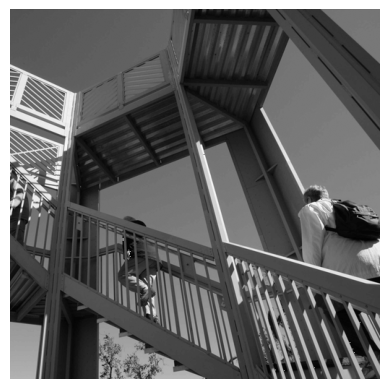

In [25]:
import cv2  # pip install opencv-python
import numpy as np
from scipy.datasets import ascent
import matplotlib.pyplot as plt

i = ascent().astype(np.float64)
plt.grid(False)
plt.gray()
plt.axis("off")
plt.imshow(i)
plt.show()

Convolution Matrix/Kernel


In [42]:
# This filter detects edges nicely
# It creates a filter that only passes through sharp edges and straight lines.
# Experiment with different values for fun effects.
vertical = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]
# A couple more filters to try for fun!
horizontal = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
edge_detection = [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]
# filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
# If all the digits in the filter don't add up to 0 or 1, you
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight = 1

Transform Image


In [34]:
def transform_image(image, kernel):
    i_transformed = np.copy(image)
    size_x = i_transformed.shape[0]
    size_y = i_transformed.shape[1]

    for x in range(1, size_x - 1):
        for y in range(1, size_y - 1):
            output_pixel = 0.0
            output_pixel += image[x - 1, y - 1] * kernel[0][0]
            output_pixel += image[x, y - 1] * kernel[0][1]
            output_pixel += image[x + 1, y - 1] * kernel[0][2]
            output_pixel += image[x - 1, y] * kernel[1][0]
            output_pixel += image[x, y] * kernel[1][1]
            output_pixel += image[x + 1, y] * kernel[1][2]
            output_pixel += image[x - 1, y + 1] * kernel[2][0]
            output_pixel += image[x, y + 1] * kernel[2][1]
            output_pixel += image[x + 1, y + 1] * kernel[2][2]

            output_pixel *= weight
            if output_pixel < 0:
                output_pixel = 0
            if output_pixel > 255:
                output_pixel = 255
            i_transformed[x, y] = output_pixel
    return i_transformed

Pool Image


In [ ]:
def pool_image(image):
    """(2,2) Pool"""

    size_x = image.shape[0]
    size_y = image.shape[1]
    new_x = int(size_x / 2)
    new_y = int(size_y / 2)
    i_pooled = np.zeros((new_x, new_y))

    for x in range(0, size_x, 2):
        for y in range(0, size_y, 2):
            pixels = []
            pixels.append(image[x, y])
            pixels.append(image[x + 1, y])
            pixels.append(image[x, y + 1])
            pixels.append(image[x + 1, y + 1])
            pixels.sort(reverse=True)
            i_pooled[int(x / 2), int(y / 2)] = pixels[0]

    return i_pooled

Display Output


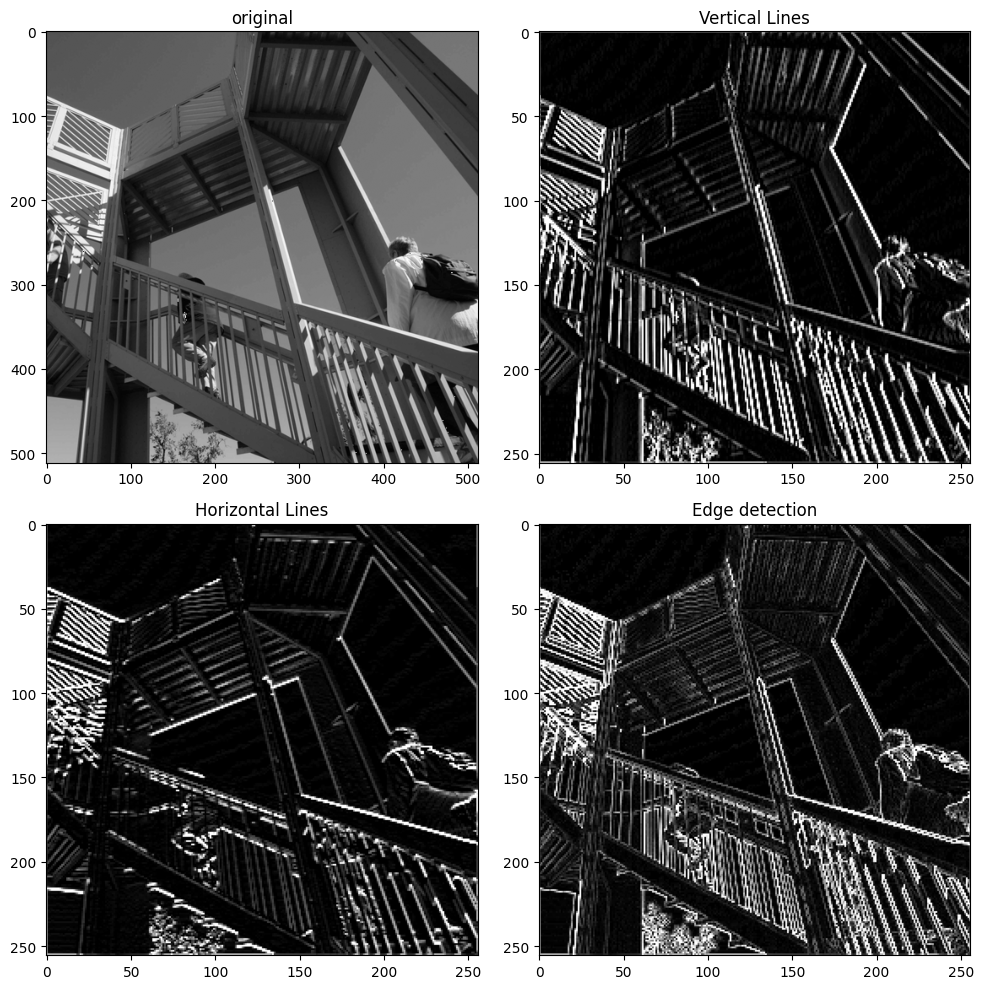

In [56]:
vertical_lines = pool_image(transform_image(i, vertical))
horizontal_lines = pool_image(transform_image(i, horizontal))
edge_sep = pool_image(transform_image(i, edge_detection))


fig, ((im, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(10,10))

im.imshow(i, cmap="gray")
im.set_title("original")

ax1.imshow(vertical_lines, cmap="gray")
ax1.set_title("Vertical Lines")

ax2.imshow(horizontal_lines, cmap="gray")
ax2.set_title("Horizontal Lines")

ax3.imshow(edge_sep, cmap="gray")
ax3.set_title("Edge detection")

plt.tight_layout()
plt.show()